In [2]:
import os
import math
import json
import logging

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
import librosa
from librosa.display import waveshow
from librosa.feature import mfcc

In [3]:
data_path = os.path.join('..', '..', 'data', 'SHIVANI_DATA_2016')
data_path

'../../data/SHIVANI_DATA_2016'

In [4]:
audio_path = os.path.join(data_path, 'aakash', 'shv_2016-aakash-VBA_before-9ab7-zoom.wav')
audio, sr = librosa.load(audio_path, dtype=np.float64, sr=None, mono=False)
print(audio)
print(sr)

[[ 0.00000000e+00 -3.05175781e-05 -3.05175781e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
48000


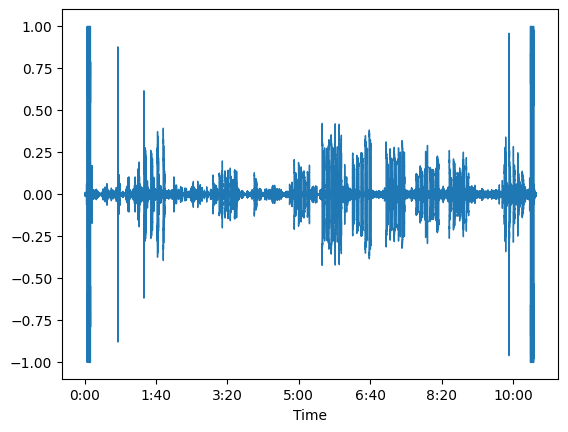

In [5]:
waveshow(audio[0], sr=sr)

In [6]:
anotation_path = os.path.join(data_path, 'aakash', 'shv_2016-aakash-VBA_before-9ab7-zoom.anote.txt')
anotation_df = pd.read_csv(anotation_path, sep='\t', names=['start', 'end', 'type'])
anotation_df.head(10)

,start,end,type
0,2.774648,3.251541,cc
1,3.829593,4.299260,cc
2,5.036276,5.440912,cc
3,6.163477,6.611467,cc
4,7.247324,7.695314,cc
5,70.536763,73.174124,ii
6,73.304186,77.162681,xx
7,77.242163,82.047218,ii
8,82.198957,86.837822,xx
9,87.047366,91.772939,ii


In [7]:
def time_to_sampleidx(row, sr):
    row['start'] = math.floor(row['start'] * sr)
    row['end'] = math.floor(row['end'] * sr)
    return row

df_sample = anotation_df.apply(lambda row: time_to_sampleidx(row, sr), axis=1)
df_sample.head(10)

,start,end,type
0,133183,156073,cc
1,183820,206364,cc
2,241741,261163,cc
3,295846,317350,cc
4,347871,369375,cc
5,3385764,3512357,ii
6,3518600,3703808,xx
7,3707623,3938266,ii
8,3945549,4168215,xx
9,4178273,4405101,ii


In [8]:
metadata_path = os.path.join(data_path, 'aakash', 'shv_2016-aakash-METADATA-report.json')
metadata_json = None
with open(metadata_path, 'r') as f:
    metadata_json = json.load(f)

metadata_json

{'subjectId': 'aakash',
 'subjectBiodata': {'subjectId': 'aakash',
  'subjectName': 'Aakash',
  'subjectAge': 24,
  'subjectHeight': 166,
  'subjectWeight': '65',
  'subjectGender': 'male',
  'subjectType': 'Control',
  'subjectAsthmaState': 'na',
  'subjectSeverity': 'Na',
  'subjectTimestamp': '2017-01-08-09-47'},
 'subjectVBAbf': {'audioFile': 'shv_2016-aakash-VBA_before-9ab7-zoom.wav',
  'anoteFile': 'shv_2016-aakash-VBA_before-9ab7-zoom.anote.txt'},
 'subjectVBAaf': {'audioFile': '', 'anoteFile': ''},
 'subjectPFTaf': {'pftFile': ''},
 'subjectPFTbf': {'pftFile': ''}}

In [9]:
HOP_LENGTH = 10 * 10**(-3)
SHIFT_LENGTH = int(HOP_LENGTH * sr)
WINDOW_LENGTH = 20 * 10**(-3)

In [10]:
df_sample['type'].unique()

array(['cc', 'ii', 'xx', 'yy', 'ee', 'uu', 'aa', 'oo', 'ss', 'zz'],
      dtype=object)

In [11]:
df_type = df_sample['type']
chunks = {
    'aa': df_sample.loc[df_type == 'aa'],
    'ee': df_sample.loc[df_type == 'ee'],
    'ii': df_sample.loc[df_type == 'ii'],
    'oo': df_sample.loc[df_type == 'oo'],
    'uu': df_sample.loc[df_type == 'uu'],
    'yy': df_sample.loc[df_type == 'yy']
} 

chunks['aa']

,start,end,type
31,17971397,18119840,aa
32,18248168,18410832,aa
33,18541240,18696620,aa
34,18814196,18969230,aa
35,19088886,19239064,aa


In [12]:
split_audio = []
for x in tqdm(chunks['aa'].itertuples(None), total=len(chunks['aa'])):
    audio_segment = audio[0][x.start:x.end]
    # pad_length = get_padding(audio_segment, SHIFT_LENGTH)
    # padded_audio_segment = np.pad(audio_segment, (0, pad_length), mode='constant')
    split_audio.append(audio_segment)

100%|██████████| 5/5 [00:00<00:00, 51527.08it/s]


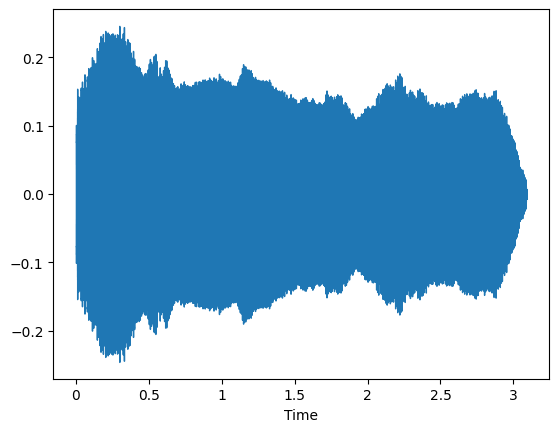

In [13]:
waveshow(split_audio[0], sr=sr)

In [14]:
res = mfcc(y = split_audio[0], sr=sr, n_mfcc=13, hop_length=SHIFT_LENGTH, win_length=math.ceil(sr*WINDOW_LENGTH), dtype=np.float64)[1:]
resT = res.T
resT.shape

(310, 12)

In [2]:
import pandas as pd
import random

# Example DataFrame (Replace this with your actual DataFrame)
data = {
    'Name': ['John', 'John', 'Alice', 'Alice', 'Bob', 'Bob', 'Bob'],
    'Age': [25, 30, 22, 27, 35, 40, 45],
    'Score': [80, 90, 85, 78, 92, 88, 95]
}

df = pd.DataFrame(data)

# Group the DataFrame by 'Name'
grouped_df = df.groupby('Name')
grouped_df.head()

,Name,Age,Score
0,John,25,80
1,John,30,90
2,Alice,22,85
3,Alice,27,78
4,Bob,35,92
5,Bob,40,88
6,Bob,45,95


In [1]:


# Take a random subset from each group (e.g., 2 rows from each group)
random_subset_size = 2  # Replace this with the desired size of the random subset

random_subset = grouped_df.apply(lambda group: group.sample(n=random_subset_size, random_state=42))

print(random_subset)

          Name  Age  Score
Name                      
Alice 3  Alice   27     78
      2  Alice   22     85
Bob   4    Bob   35     92
      5    Bob   40     88
John  1   John   30     90
      0   John   25     80
